<a href="https://colab.research.google.com/github/pati-dev/common-voice/blob/master/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insights

* **Train**, **Test**, and **Validated** *tsv* files have around $63K$, $13K$, and $644K$ sentences/clips respectively with $1.5K$, $8K$, and $32K$ unique speakers
* Most of the data in **Test** has missing values for *age*, *gender*, and *accent* attributes
* Cross-tabs on *gender* and *accent* get too thin for most combinations on **Train** data; only $2$ or $3$ accents have more than $1000$ samples
* **Validated** data seems promising with the following accents having at least $1000$ samples for each combination of *gender* and *accent*

  * *australia*
  * *canada*
  * *england*
  * *indian*
  * *scotland*
  * *usa*
* Most of the sound clips have about $2$ upvotes across all datasets

# Code

## Boot

In [0]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
loc = '/content/drive/My Drive/Common Voice Data/en/'

## EDA on original data

### Train data

In [0]:
trainDF = pd.read_csv(loc + 'train.tsv', sep='\t')

In [7]:
trainDF.head(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,9d16c5d980247861130e0480e2719f448be73d86a496c3...,common_voice_en_18885784.mp3,"He was accorded a State funeral, and was burie...",2,0,NaN,NaN,NaN
1,9d16c5d980247861130e0480e2719f448be73d86a496c3...,common_voice_en_18885785.mp3,"In American English, ""whilst"" is considered to...",2,0,NaN,NaN,NaN
2,9d16c5d980247861130e0480e2719f448be73d86a496c3...,common_voice_en_18885786.mp3,"Once again, she is seen performing on a comput...",2,0,NaN,NaN,NaN
3,9d16c5d980247861130e0480e2719f448be73d86a496c3...,common_voice_en_18885787.mp3,Hippety Hopper returns in McKimson's Pop 'Im Pop!,2,0,NaN,NaN,NaN
4,9d16c5d980247861130e0480e2719f448be73d86a496c3...,common_voice_en_18885788.mp3,"Today, their programs are available on the Int...",2,0,NaN,NaN,NaN


In [8]:
trainDF.tail(5)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
63325,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_en_18792608.mp3,It is almost exclusively in the final version ...,2,1,twenties,male,NaN
63326,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_en_18792609.mp3,All songs written by Mark Greaney.,2,0,twenties,male,NaN
63327,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_en_18792611.mp3,Later the ninth and tenth grades were added.,2,1,twenties,male,NaN
63328,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_en_18792612.mp3,"Aull, who named it Quasi-Rolle theorem.",2,1,twenties,male,NaN
63329,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_en_18797008.mp3,The Abbey Brook flows into the reservoir from ...,2,1,twenties,male,NaN


In [36]:
trainDF.describe(include='O')

,client_id,path,sentence,age,gender,accent
count,63330,63330,63330,56131,56257,44348
unique,1609,63330,63330,9,3,15
top,ab72e9ab22713aec03a3189202a0713e56016ea07569b3...,common_voice_en_18857418.mp3,"With the start of Oprichnina, however, Ivan's ...",twenties,male,us
freq,5944,1,1,19567,44908,24993


In [22]:
trainDF[['age', 'client_id']].astype(str).groupby(['age'], as_index=False).count().sort_values(by='client_id', ascending=False)

,age,client_id
9,twenties,19567
8,thirties,11638
6,sixties,8966
3,nan,7199
2,fourties,6070
1,fifties,4517
7,teens,4364
5,seventies,761
0,eighties,195
4,nineties,53


In [23]:
trainDF[['accent', 'client_id']].astype(str).groupby(['accent'], as_index=False).count().sort_values(by='client_id', ascending=False)

,accent,client_id
14,us,24993
8,nan,18982
3,england,5287
5,indian,4556
1,australia,3834
2,canada,3153
9,newzealand,585
0,african,442
12,scotland,375
11,philippines,322


In [24]:
trainDF[['gender', 'client_id']].astype(str).groupby(['gender'], as_index=False).count().sort_values(by='client_id', ascending=False)

,gender,client_id
1,male,44908
0,female,9952
2,nan,7073
3,other,1397


In [29]:
pd.crosstab(trainDF['gender'].astype(str), trainDF['accent'].astype(str))

accent,african,australia,canada,england,hongkong,indian,ireland,malaysia,nan,newzealand,other,philippines,scotland,singapore,us,wales
gender,,,,,,,,,,,,,,,,
female,96,250,1732,140,16,793,61,32,2817,0,0,76,327,0,3612,0
male,346,2622,1421,5052,4,3763,196,82,9263,585,113,246,48,294,20870,3
nan,0,45,0,61,0,0,0,0,6875,0,0,0,0,0,92,0
other,0,917,0,34,0,0,0,0,27,0,0,0,0,0,419,0


In [37]:
trainDF.describe()

,up_votes,down_votes
count,63330.000000,63330.000000
mean,2.051240,0.155724
std,0.283579,0.368814
min,2.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,20.000000,4.000000


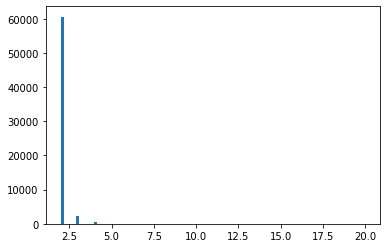

In [34]:
plt.hist(trainDF['up_votes'], bins=100)
plt.show()

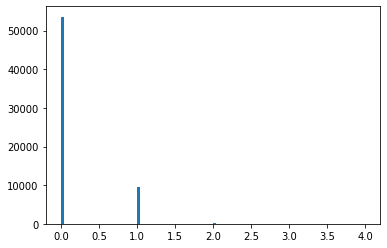

In [35]:
plt.hist(trainDF['down_votes'], bins=100)
plt.show()

### Test data

In [0]:
testDF = pd.read_csv(loc + 'test.tsv', sep='\t')

In [65]:
testDF.describe(include='O')

,client_id,path,sentence,age,gender,accent
count,13178,13178,13177,1917,1912,1311
unique,8019,13178,13177,9,3,17
top,445eeb6ca660413543ed64b31d67e8ed4cfb42fda819e0...,common_voice_en_502640.mp3,Drinking too much coke can cause diabetes.,twenties,male,us
freq,4,1,1,911,1618,630


In [38]:
testDF[['age', 'client_id']].astype(str).groupby(['age'], as_index=False).count().sort_values(by='client_id', ascending=False)

,age,client_id
3,nan,11261
9,twenties,911
8,thirties,415
7,teens,225
2,fourties,177
1,fifties,108
6,sixties,54
5,seventies,23
0,eighties,3
4,nineties,1


In [39]:
testDF[['accent', 'client_id']].astype(str).groupby(['accent'], as_index=False).count().sort_values(by='client_id', ascending=False)

,accent,client_id
9,nan,11867
16,us,630
6,indian,290
4,england,154
3,canada,58
11,other,33
0,african,25
7,ireland,23
1,australia,22
13,scotland,12


In [40]:
testDF[['gender', 'client_id']].astype(str).groupby(['gender'], as_index=False).count().sort_values(by='client_id', ascending=False)

,gender,client_id
2,nan,11266
1,male,1618
0,female,285
3,other,9


In [42]:
pd.crosstab(testDF['gender'].astype(str), testDF['accent'].astype(str))

accent,african,australia,bermuda,canada,england,hongkong,indian,ireland,malaysia,nan,newzealand,other,philippines,scotland,singapore,southatlandtic,us,wales
gender,,,,,,,,,,,,,,,,,,
female,0,5,3,7,20,5,28,2,4,98,1,5,3,1,0,0,101,2
male,25,15,7,51,130,6,260,16,7,522,10,28,7,11,2,3,516,2
nan,0,2,0,0,0,0,2,4,0,11245,0,0,0,0,2,0,11,0
other,0,0,0,0,4,0,0,1,0,2,0,0,0,0,0,0,2,0


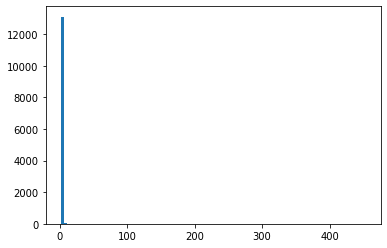

In [51]:
plt.hist(testDF['up_votes'], bins=100)
plt.show()

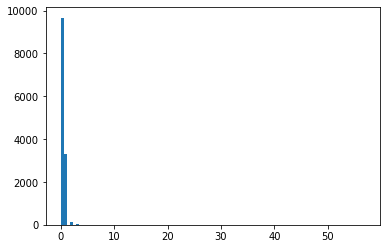

In [48]:
plt.hist(testDF['down_votes'], bins=100)
plt.show()

### Validated data

In [0]:
valDF = pd.read_csv(loc + 'validated.tsv', sep='\t')

In [64]:
valDF.describe(include="O")

,client_id,path,sentence,age,gender,accent
count,644119,644119,644113,369018,371045,304119
unique,31857,644119,89685,9,3,17
top,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_en_18161500.mp3,It had a diameter of about thirty yards.,twenties,male,us
freq,6083,1,309,127535,290987,149637


In [52]:
valDF[['age', 'client_id']].astype(str).groupby(['age'], as_index=False).count().sort_values(by='client_id', ascending=False)

,age,client_id
3,nan,275101
9,twenties,127535
8,thirties,97350
2,fourties,51810
1,fifties,32236
7,teens,27843
6,sixties,23863
5,seventies,7509
0,eighties,816
4,nineties,56


In [53]:
valDF[['accent', 'client_id']].astype(str).groupby(['accent'], as_index=False).count().sort_values(by='client_id', ascending=False)

,accent,client_id
9,nan,340000
16,us,149637
4,england,58607
6,indian,23966
1,australia,20172
3,canada,17586
11,other,10341
10,newzealand,6070
13,scotland,4382
0,african,4089


In [54]:
valDF[['gender', 'client_id']].astype(str).groupby(['gender'], as_index=False).count().sort_values(by='client_id', ascending=False)

,gender,client_id
1,male,290987
2,nan,273074
0,female,72527
3,other,7531


In [55]:
pd.crosstab(valDF['gender'].astype(str), valDF['accent'].astype(str))

accent,african,australia,bermuda,canada,england,hongkong,indian,ireland,malaysia,nan,newzealand,other,philippines,scotland,singapore,southatlandtic,us,wales
gender,,,,,,,,,,,,,,,,,,
female,957,2867,226,6179,8238,30,6178,449,284,11758,312,703,500,1061,79,0,32615,91
male,3108,13918,137,11125,49831,1151,17740,2717,559,57765,5758,9474,830,3184,619,212,111829,1030
nan,24,450,86,4,170,0,48,4,0,270074,0,139,0,0,4,0,2071,0
other,0,2937,0,278,368,0,0,254,0,403,0,25,0,137,0,0,3122,7


In [14]:
valDF.describe()

,up_votes,down_votes
count,644119.000000,644119.000000
mean,2.518237,0.185790
std,6.495008,1.002318
min,2.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,1614.000000,529.000000


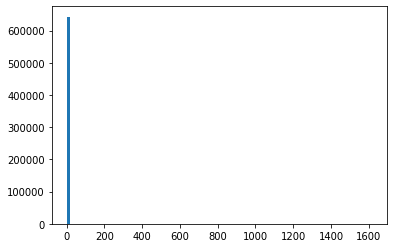

In [60]:
plt.hist(valDF['up_votes'], bins=100)
plt.show()

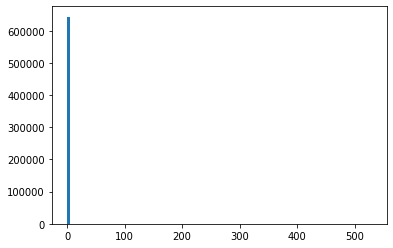

In [62]:
plt.hist(valDF['down_votes'], bins=100)
plt.show()

## EDA on partitioned data

### Subset and parition data

In [0]:
valDF = pd.read_csv(loc + 'validated.tsv', sep='\t')

In [0]:
validAccents = ['us', 'canada', 'england', 'indian', 'scotland', 'australia']
validGenders = ['male', 'female']

cleanedDF = valDF.loc[valDF.accent.isin(validAccents) & valDF.gender.isin(validGenders), ]

### Number of sentences or clips by age

In [30]:
cleanedDF[['age', 'client_id']].astype(str).groupby(['age'], as_index=True).nunique().sort_values(by='client_id', ascending=False)

,age,client_id
age,,
twenties,1,2170
thirties,1,1205
fourties,1,640
teens,1,628
fifties,1,409
sixties,1,228
seventies,1,94
nan,1,32
eighties,1,11


### Number of unique speaker by age

In [25]:
cleanedDF[['age', 'client_id']].astype(str).groupby(['age'], as_index=False).count().sort_values(by='client_id', ascending=False)

,age,client_id
9,twenties,83886
8,thirties,71051
2,fourties,38186
1,fifties,26230
6,sixties,20903
7,teens,17532
5,seventies,3952
3,nan,2326
0,eighties,643
4,nineties,56


### Total number of sentences or clips by *gender* and *accent*:

In [20]:
pd.crosstab(cleanedDF['gender'].astype(str), 
            cleanedDF['accent'].astype(str),
            margins=True)

accent,australia,canada,england,indian,scotland,us,All
gender,,,,,,,
female,2867,6179,8238,6178,1061,32615,57138
male,13918,11125,49831,17740,3184,111829,207627
All,16785,17304,58069,23918,4245,144444,264765


### Unique number of speakers by *gender* and *accent*:

In [18]:
pd.crosstab(cleanedDF['gender'].astype(str), 
            cleanedDF['accent'].astype(str), 
            margins=True, 
            values=cleanedDF['client_id'], 
            aggfunc=pd.Series.nunique)

accent,australia,canada,england,indian,scotland,us,All
gender,,,,,,,
female,61,102,145,85,8,630,1031
male,206,260,820,718,61,2323,4388
All,267,362,965,803,69,2953,5419


### Write subsetted paths to *txt*

In [0]:
with open(loc + 'fnames.txt', 'w') as f:
  f.write("mkdir -p en/selected_clips/\n")
  for path in cleanedDF['path'][5:]:
    f.write("cp -v en/clips/%s en/selected_clips/\n" % path)

In [1]:
cleanedDF['path'][5:]

NameError: ignored